# Transformer: It's all about Attention!

Or self-attention, to be more precise.

Transformer is commonly used for language translation and text generation (such as ChatGPT). What makes transformer different from older ML techniques such as RNN is that it looks at all the words at once and decides which ones matter most to each other using an attention mechanism.

## Attention
In this rather famous example: "The cat, which is fluffy, sleeps." The word "fluffy" relates to "cat," not "sleeps." Attention helps the transformer focus on those connections, even if the words are far apart. It assigns weights (numbers) to show how much each word should "pay attention" to others.

## Word Embeddings
Words get turned into numbers (vectors) using embeddings. Say "cat" becomes [0.1, 0.5, -0.2].

## Attention Scores
For each word, the model calculates how much it relates to every other word:

$$ Attention = softmax(Q * K^T / sqrt(d)) $$

Where:
- Q (query) = input_embedding * WQ (a Weight Matrix), representing what we are looking for.
- K (key) = input_embedding * WK (a Weight Matrix), representing what information each input contains such as an index or label for the content.
- V (value) = input_embedding * WV (a Weight Matrix), representing the actual content we want to retrieve.
- d is the size of the word embeddings.

The attention mechanism works by:

1. Computing compatibility between Q and K: score = Q × K^T
2. Scaling and applying softmax to get attention weights
3. Using these weights to get a weighted sum of V

```python
# Attention calculation
scores = np.dot(Q, K.transpose()) / np.sqrt(d_k)  # d_k is dimension of keys
attention_weights = softmax(scores)
output = np.dot(attention_weights, V)
```
Think of it like searching in a library:

- Query (Q): What you're looking for
- Keys (K): Book titles/indexes
- Values (V): Actual content of the books
- `output` is the model combines the original word vectors (V, for "value") using these weights to make a new vector that "knows" about the context.

### Toy Code Example 

Attention Weights:
 [[0.38801226 0.30828878 0.30369896]
 [0.3008774  0.41434662 0.28477599]
 [0.30879344 0.29668548 0.39452108]]
Output Vectors:
 [[ 0.07100705  0.22391704  0.13774071  0.02621196]
 [ 0.11039359  0.16595923  0.21691009  0.03074455]
 [ 0.03119721  0.20363239  0.15570471 -0.04528541]]


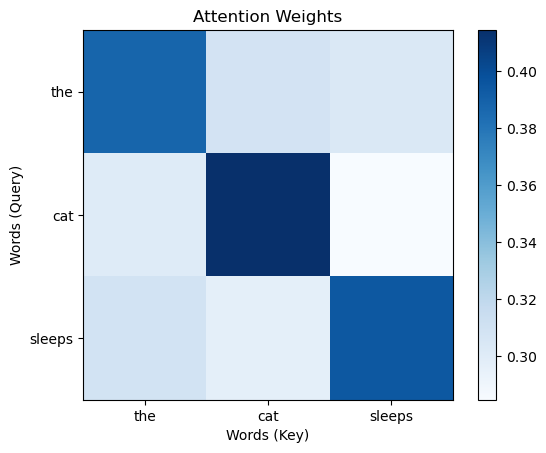

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Fake word embeddings (3 words, 4 dimensions each)
words = np.array([[0.1, 0.5, -0.2, 0.3],  # "the"
                  [0.4, -0.1, 0.6, 0.2],  # "cat"
                  [-0.3, 0.2, 0.1, -0.5]]) # "sleeps"

# Simple attention: Q, K, V are the same here for simplicity
Q = words  # Query
K = words  # Key
V = words  # Value

# Calculate attention scores
d = words.shape[1]  # Dimension = 4
scores = np.dot(Q, K.T) / np.sqrt(d)  # Q * K^T / sqrt(d)
weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)  # Softmax

# Apply weights to values
output = np.dot(weights, V)

print("Attention Weights:\n", weights)
print("Output Vectors:\n", output)

# Plot attention weights as a heatmap
plt.imshow(weights, cmap='Blues', interpolation='nearest')
plt.title("Attention Weights")
plt.xlabel("Words (Key)")
plt.ylabel("Words (Query)")
plt.colorbar()
plt.xticks([0, 1, 2], ["the", "cat", "sleeps"])
plt.yticks([0, 1, 2], ["the", "cat", "sleeps"])
plt.show()


### What’s Happening?
- `words`: Pretend these are embeddings for "the," "cat," and "sleeps."
- `scores`: Measures how similar each word is to every other word.
- `weights`: Turns scores into probabilities (attention weights).
- `output`: New vectors where each word now "knows" about the others.

### Graphical Plot
The code generates a heatmap. Each square shows how much one word attends to another. Darker colors mean stronger attention. For example, "cat" might pay more attention to "the" than "sleeps."

## A more technical example comes later....